### 1. Problem Statement 

- Develop a machine learning model to classify breast cancer tumors as either malignant or benign based on various features extracted from cell nuclei.

### 2. Import Libraries and Gathering Datasets

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd

# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
data = pd.DataFrame(data.data, columns=data.feature_names)
data['target'] = load_breast_cancer().target

# Display the DataFrame
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 3. Splitting data

In [36]:
data = load_breast_cancer()
x = data.data
y = data.target

### 4. Training and Testing 

In [37]:
# Split dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

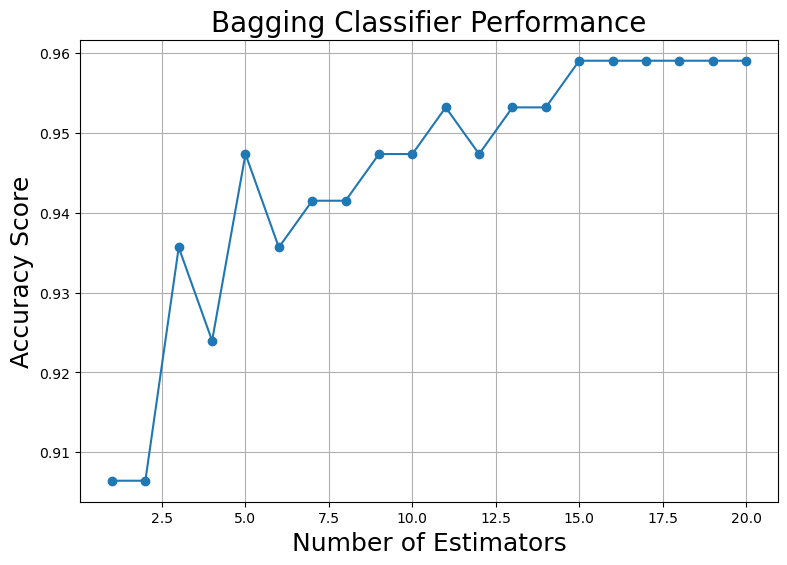

In [38]:
# Range of number of estimators to evaluate
estimator_range = np.arange(1, 21)
scores = []

# Evaluate BaggingClassifier with different numbers of estimators
for n_estimators in estimator_range:
    bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42)
    bagging_clf.fit(X_train, Y_train)
    Y_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    scores.append(accuracy)

# Plotting
plt.figure(figsize=(9, 6))
plt.plot(estimator_range, scores, marker='o')
plt.xlabel("Number of Estimators", fontsize=18)
plt.ylabel("Accuracy Score", fontsize=18)
plt.title("Bagging Classifier Performance", fontsize=20)
plt.grid()
plt.show()

In [39]:
# Create Bagging Classifier with multiple decision trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, Y_train)

# Predictions
Y_pred = bagging_clf.predict(X_test)

# Evaluate
print(f"Bagging Accuracy: {accuracy_score(Y_test, Y_pred)}")


Bagging Accuracy: 0.9473684210526315


# Boosting 

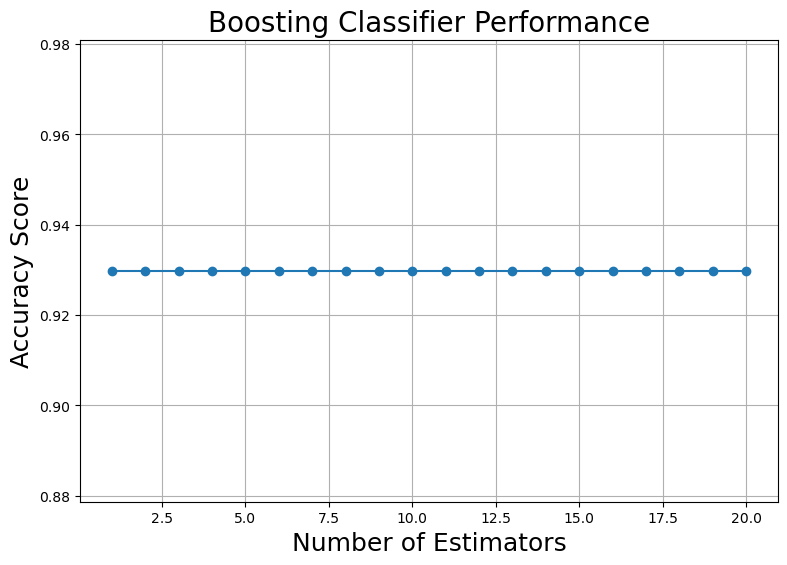

In [42]:
# Range of number of estimators to evaluate
estimator_range = np.arange(1, 21)
scores = []

# Evaluate BaggingClassifier with different numbers of estimators
for n_estimators in estimator_range:
    bagging_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42)
    bagging_clf.fit(X_train, Y_train)
    Y_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    scores.append(accuracy)

# Plotting
plt.figure(figsize=(9, 6))
plt.plot(estimator_range, scores, marker='o')
plt.xlabel("Number of Estimators", fontsize=18)
plt.ylabel("Accuracy Score", fontsize=18)
plt.title("Boosting Classifier Performance", fontsize=20)
plt.grid()
plt.show()

In [40]:
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the model
boosting_clf.fit(X_train, Y_train)

# Predictions
Y_pred = boosting_clf.predict(X_test)

# Evaluate
print(f"Boosting Accuracy: {accuracy_score(Y_test, Y_pred)}")

Boosting Accuracy: 0.9766081871345029
